# Compare Result

this notebook created for comparing result between predicted result from ML model and truth set 

In [ ]:
!pip install venn

In [3]:
from venn import venn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [52]:
columns = ["ID_Query","ID_Target","sequence_identity","alignment_length","number_of_mismatches","number_of_gap_openings", "start-position_in_query", "end-position_in_query", "start-position_in_target","end-position_in_target","E-value","bit_score"]

## RAT

In [7]:
rat_ML =  pd.read_pickle("/home/kongkitimanonk/SCRATCH_NOBAK/phase3/RAT.len15.MLresults.pkl")
rat_ML

,class
0,0
1,0
2,0
3,0
4,0
...,...
310772,0
310773,0
310774,0
310775,0


In [14]:
rat_read_len10_truth = pd.read_csv("/home/kongkitimanonk/SCRATCH_NOBAK/cd-hit/fasta/output/rat.alnRes.m8.len10.tsv",encoding = "ISO-8859-1", sep='\t',header=None)
#rat_read_len10_truth.columns =  columns
rat_read_len10_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,171224,ADAM_1534|adam_test,1.000,17,0,0,1,17,117,133,2.010000e-08,43
1,171224,dbAMP_02476,0.928,14,1,0,4,17,121,134,3.123000e-05,34
2,13803,DRAMP04700|DRAMP_Anti-Gram+_amps,0.518,27,13,0,2,28,12,38,1.740000e-05,35
3,13803,ADAM_4699|adam_test,0.560,25,11,0,4,28,30,54,3.308000e-05,34
4,13803,ADAM_6594|adam_test,0.481,27,13,0,2,28,12,38,4.563000e-05,34
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,249338,dbAMP_07555,0.450,20,10,0,2,21,116,135,3.836000e-04,31
3029,249338,ADAM_0751|adam_test,0.450,20,10,0,2,21,126,145,3.836000e-04,31
3030,84749,dbAMP_07555,0.705,17,5,0,1,17,4,20,4.044000e-04,31
3031,84749,ADAM_0751|adam_test,0.705,17,5,0,1,17,14,30,4.044000e-04,31


### AMPS that match to the truth set

select only AMPs from ML result

In [21]:
rat_AMPs_ML= rat_ML[rat_ML["class"] == 0]
rat_AMPs_ML

,class
0,0
1,0
2,0
3,0
4,0
...,...
310772,0
310773,0
310774,0
310775,0


In [34]:
RAT_total_AMPS = len(rat_read_len10_truth['ID_Query'].unique())
RAT_total_AMPS

509

<AxesSubplot:>

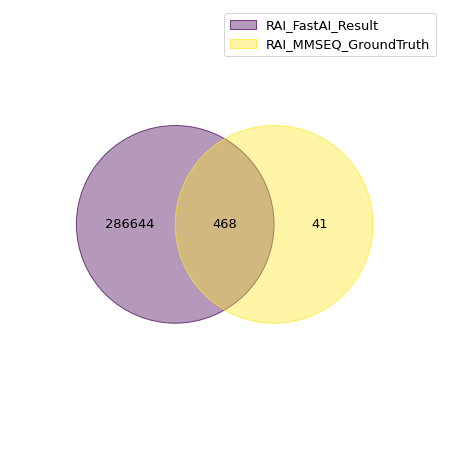

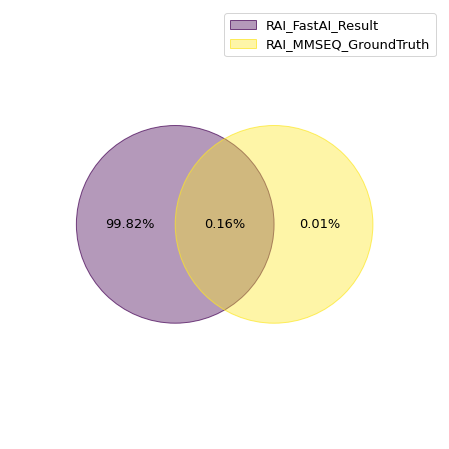

In [32]:
RATSamples = {
    "RAI_FastAI_Result":  set(rat_AMPs_ML.index.values),
    "RAI_MMSEQ_GroundTruth": set(rat_read_len10_truth['ID_Query']),
}
venn(RATSamples)
venn(RATSamples, fmt="{percentage:.2f}%")


Calulate from truth set only

In [36]:
accuracy = (468/RAT_total_AMPS )*100
print("%.2f" % accuracy)

91.94


## Taiwanese Oolong 

Use 20 len produce highest AMPs

In [49]:
TaiOo_ML =  pd.read_pickle("/home/kongkitimanonk/SCRATCH_NOBAK/phase3/TaiwaneseOolong.len10.MLresults.pkl")
TaiOo_ML

,class
0,1
1,1
2,0
3,0
4,0
...,...
1159176,0
1159177,1
1159178,1
1159179,1


In [53]:
TaiOo_len10_truth = pd.read_csv("/home/kongkitimanonk/SCRATCH_NOBAK/cd-hit/fasta/output/Oolong.len10.alnRes.m8.tsv",encoding = "ISO-8859-1", sep='\t',header=None)
TaiOo_len10_truth.columns = columns
TaiOo_len10_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,703620,2633_Hemolytik_allsequences|Hemolytik_allseque...,0.931,29,2,0,1,29,27,55,1.252000e-13,59
1,226682,ADAM_6548|adam_test,0.680,25,8,0,2,26,103,127,8.391000e-07,39
2,226682,ADAM_6220|adam_test,0.653,26,9,0,1,26,34,59,3.029000e-06,38
3,226682,dbAMP_11303,0.640,25,9,0,2,26,44,68,4.176000e-06,37
4,226682,ADAM_6559|adam_test,0.600,25,10,0,2,26,44,68,1.510000e-05,36
...,...,...,...,...,...,...,...,...,...,...,...,...
6666,677133,911_pos_train_ds3|pos_train_ds3,0.655,29,10,0,1,29,38,66,1.952000e-06,38
6667,677133,910_pos_train_ds3|pos_train_ds3,0.620,29,11,0,1,29,38,66,2.691000e-06,38
6668,677133,1047_pos_train_ds3|pos_train_ds3,0.518,27,13,0,1,27,52,78,1.340000e-05,36
6669,1279053,AVP0464|AVPdb_data,0.944,18,1,0,1,18,8,25,1.323000e-06,39


In [57]:
TaiOo_total_AMPS = len(TaiOo_len10_truth['ID_Query'].unique())
TaiOo_total_AMPS

1700

In [59]:
TaiOo_AMPs_ML= TaiOo_ML[TaiOo_ML["class"] == 0]
TaiOo_AMPs_ML

,class
2,0
3,0
4,0
8,0
9,0
...,...
1159168,0
1159169,0
1159172,0
1159173,0


<AxesSubplot:>

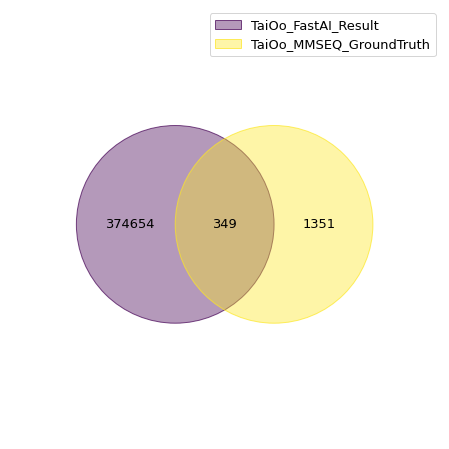

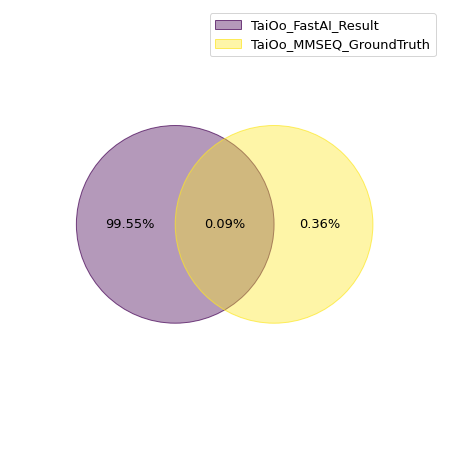

In [60]:
TaiOoSamples = {
    "TaiOo_FastAI_Result":  set(TaiOo_AMPs_ML.index.values),
    "TaiOo_MMSEQ_GroundTruth": set(TaiOo_len10_truth['ID_Query']),
}
venn(TaiOoSamples)
venn(TaiOoSamples, fmt="{percentage:.2f}%")

In [61]:
accuracy = (349/TaiOo_total_AMPS )*100
print("%.2f" % accuracy)

20.53


## DECockroach

In [62]:
DECockroach_ML =  pd.read_pickle("/home/kongkitimanonk/SCRATCH_NOBAK/phase3/DECockroach.len15.MLresults.pkl")
DECockroach_ML

,class
0,0
1,0
2,0
3,0
4,0
...,...
890304,0
890305,0
890306,0
890307,0


In [63]:
DECockroach_len15_truth = pd.read_csv("/home/kongkitimanonk/SCRATCH_NOBAK/cd-hit/fasta/output/DECockroach.alnRes.m8.len15.tsv",encoding = "ISO-8859-1", sep='\t',header=None)
DECockroach_len15_truth.columns = columns
DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,792259,E08707|Spleen,0.875,16,2,0,1,16,8,23,3.557000e-07,39
1,792259,E08714|Spleen,0.875,16,2,0,2,17,1,16,4.895000e-07,39
2,180767,AP02583|Defensin,0.714,14,4,0,1,14,50,63,2.131000e-04,31
3,180767,L05ADEF509|,0.692,13,4,0,2,14,26,38,4.044000e-04,31
4,823121,E22349|Antimicrobial,0.909,22,2,0,9,30,1,22,8.394000e-08,42
...,...,...,...,...,...,...,...,...,...,...,...,...
6469,530351,E08714|Spleen,1.000,16,0,0,16,31,1,16,1.133000e-07,43
6470,494399,10896_dbaasp|dbaasp_peptides,0.666,15,5,0,2,16,2,16,4.044000e-04,31
6471,494399,10897_dbaasp|dbaasp_peptides,0.666,15,5,0,2,16,4,18,5.571000e-04,30
6472,110985,dbAMP_12224,0.588,17,7,0,1,17,40,56,1.201000e-04,32


In [64]:
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
DECockroach_total_AMPS

920

In [65]:
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_AMPs_ML

,class
0,0
1,0
2,0
3,0
4,0
...,...
890304,0
890305,0
890306,0
890307,0


<AxesSubplot:>

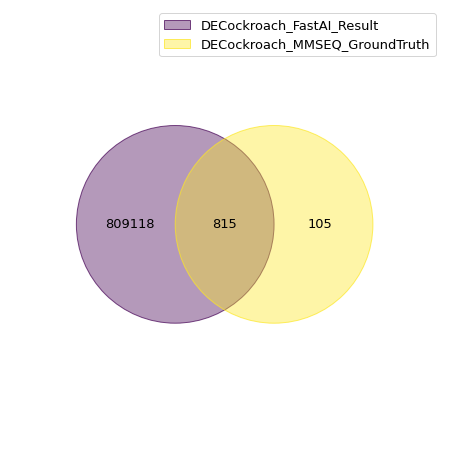

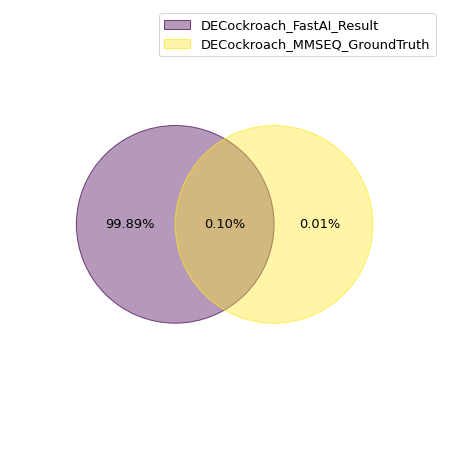

In [66]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_AMPs_ML.index.values),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [67]:
accuracy = (815/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)

88.59
